In [59]:
import numpy as np
import pandas as pd

In [60]:
dir(pd)

['Categorical',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int64Index',
 'LooseVersion',
 'MultiIndex',
 'NaT',
 'Panel',
 'Panel4D',
 'Period',
 'PeriodIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseList',
 'SparsePanel',
 'SparseSeries',
 'SparseTimeSeries',
 'Term',
 'TimeGrouper',
 'TimeSeries',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'WidePanel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__warningregistry__',
 '_np_version',
 '_np_version_under1p8',
 '_np_version_under1p9',
 '_period',
 '_sparse',
 '_testing',
 '_version',
 'algos',
 'bdate_range',
 'compat',
 'computation',
 'concat',
 'core',
 'crosstab',
 'cut',
 'date_range',
 'datetime',
 'datetools',
 'describe_option',
 'eval',
 'ewma',
 'ewmcorr',
 '

### Чтение файла 

In [163]:
# менять данную константу, если нужно сменить имя файла
FILE = 'try.xlsx'

In [164]:
data = pd.read_excel(FILE, index_col=0)

In [165]:
val = data.values
np.isnan(val)
np.sum(~np.isnan(val))

44

## 1) Фильтр отсутствия данных

In [170]:
#Константа для порогового значения, больше этого значения анкеты убираем
THRESHOLD = 0.4

Формируем набор $\phi_i $

In [171]:
logic_data = data.isnull()
ssv = logic_data.sum().sum() #сумма по всем v_ij
sv = logic_data.sum() #сумма по столбцам
#print(sv)
q_j = ssv/sv
sq_j = q_j[q_j != np.inf].sum() # стобцы со всеми заполненными строками не участвуют
#print(sq_j)

q_j[q_j == np.inf] = sq_j #костыли, чтоб бесконечности не было
Q_j = q_j / sq_j
#print(Q_j)
pheta_table = Q_j * logic_data
pheta_i = pheta_table.sum(axis=1)
pheta_i_sorted = pheta_i.sort_values(ascending=False)
pheta_i_sorted[pheta_i_sorted>THRESHOLD]

Date
2015-12-20    0.588235
2015-12-21    0.411765
dtype: float64

Визуализируем

Populating the interactive namespace from numpy and matplotlib


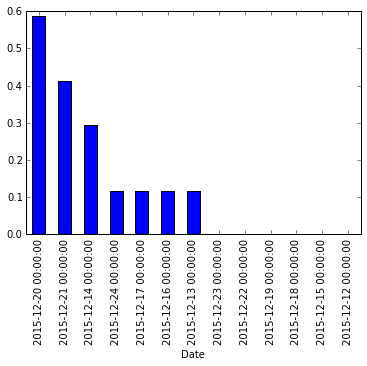

In [188]:
import matplotlib.pylab as pl
%pylab inline
pheta_i_sorted.plot(kind='bar')


In [155]:
dir(pheta_i)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',

##  2) Фильтр отсутствия данных групповой

In [193]:
Nr = 5 # Количество анкет в пакете

In [212]:
ss_pheta_i = pheta_i.sum().sum()
Nr_counter = 0
N0 = len(data.index)
#делаем массив пакетов (начало, конец)
groups = []
one = []
for row_n in range(N0):
    if (len(one) == Nr) or (row_n == len(data.index)-1):
        groups.append(one)
        one = []
    one.append(data.index[row_n])
    
Vr = []
for group in groups:
    pheta_group = pheta_i[group]
    Wr = pheta_group.sum() / len(group)
    W_r = (ss_pheta_i -  pheta_group.sum()) / (N0 - len(group))
    Vr.append(W_r - Wr)

In [215]:

pl.bar(Vr)

TypeError: bar() missing 1 required positional argument: 'height'

Date
2015-12-12    0.000000
2015-12-13    0.117647
2015-12-14    0.294118
2015-12-15    0.000000
2015-12-16    0.117647
2015-12-17    0.117647
2015-12-18    0.000000
2015-12-19    0.000000
2015-12-20    0.588235
2015-12-21    0.411765
2015-12-22    0.000000
2015-12-23    0.000000
2015-12-24    0.117647
dtype: float64